In [1]:
import numpy as np
from arftools import *
from collections import namedtuple
import pandas as pd

def sigmoid(x,l=1):
    return 2*(1.0/(1.+np.exp(-l*x))-.5)
    #return np.tanh(x)
def dSigmoid(x,l=1):
    return (l*np.exp(-l*x))/((1.0+np.exp(-l*x))**2)

%matplotlib inline
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np

class Classifier(object):
    """ Classe generique d'un classifieur
        Dispose de 3 méthodes :
            fit pour apprendre
            predict pour predire
            score pour evaluer la precision
    """
    def fit(self,data,y):
        raise NotImplementedError("fit non  implemente")
    def predict(self,data):
        raise NotImplementedError("predict non implemente")
    def score(self,data,y):
        return (self.predict(data)==y).mean()

def v2m(x):
    return x.reshape((x.size,1)) if len(x.shape)==1 else x

def cross_validation(model,x,y,k):
    n=len(x)
    index_perm=np.random.permutation(range(n))
    scores=np.zeros((k))
    x_perm=x[[index_perm]]
    y_perm=y[[index_perm]]
    for index in range(k):        
        ik=int(float(index)*n/k)
        ikp1=int(float(index+1)*n/k)
        x_train=np.vstack((x_perm[:ik],x_perm[ikp1:]))
        y_train=np.concatenate((y_perm[:ik],y_perm[ikp1:]))
        x_test=x_perm[ik:ikp1]
        model.fit(x_train,y_train)        
        y_test=y_perm[ik:ikp1]
        scores[index]=model.score(x_test,y_test)
        #print('round '+str(index)+': '+str(scores[index])+'%.')
    return scores.mean()    


In [72]:


class xor(Classifier):
    def __init__(self,layers,e=.2,maxIter=100000): #layer = [2,2,1] ds exemple
        self.w = []
        for i in range(1, len(layers) - 1):
            weight = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.w.append(weight)
        weight = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.w.append(weight)
        self.maxIter = maxIter
        self.epsi = e 
    def fit(self,x,y):
        x = np.array(x)
        y = np.array(y)
        #biais ajouter au début sur les x
        uns = np.atleast_2d(np.ones(x.shape[0]))
        x = np.concatenate((uns.T, x), axis=1)
        
        for k in range(self.maxIter):
            #batch
            i = np.random.randint(x.shape[0])
            a = [x[i]]

            for l in range(len(self.w)):
                    dot_value = np.dot(a[l], self.w[l])
                    activation = sigmoid(dot_value)
                    a.append(activation)
            
            # output layer
            error = y[i] - a[-1]
            
            deltas = [error * dSigmoid(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.w[l].T)*dSigmoid(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.w)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.w[i] += self.epsi*layer.T.dot(delta)

            if k % 10000 == 0: print 'itération:', k

    def predict(self,x):
        a = np.concatenate((np.atleast_2d(np.ones(x.shape[0])).T, np.array(x)), axis=1)      
        for l in range(0, len(self.w)):
                    
            a = sigmoid(np.dot(a, self.w[l]))
            
        
        return (np.sign(a))

    def score(self,data,y):
        return (self.predict(data).T[0]==y).mean()

itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


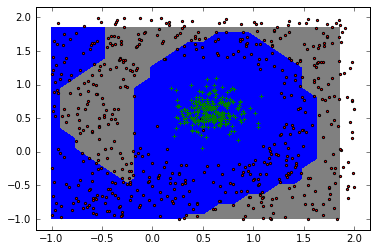

0.307125307125


In [87]:
%matplotlib inline
nn = xor([2,10,10,10,1],.1,100000)
   
df1=pd.read_csv('data/concentric.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)

itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


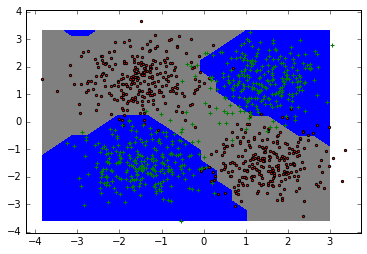

0.93


In [74]:
%matplotlib inline
nn = xor([2,2,1],0.01,100000)
   
df1=pd.read_csv('data/four_gaussians.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)

itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


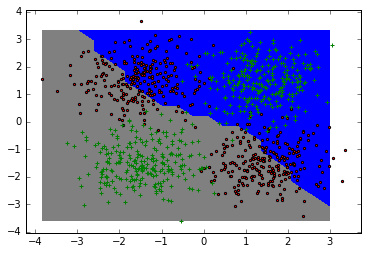

0.504


In [75]:
%matplotlib inline
nn = xor([2,2,1],0.0001,100000)
   
df1=pd.read_csv('data/four_gaussians.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)

itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


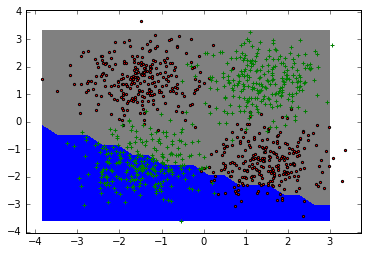

0.647


In [76]:
%matplotlib inline
nn = xor([2,2,1],0.5,100000)
   
df1=pd.read_csv('data/four_gaussians.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)


itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


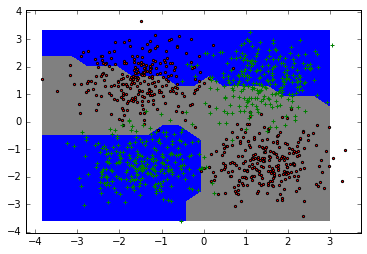

0.792


In [77]:
%matplotlib inline
nn = xor([2,2,1],0.1,100000)
   
df1=pd.read_csv('data/four_gaussians.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)

itération: 0
itération: 10000
itération: 20000
itération: 30000
itération: 40000
itération: 50000
itération: 60000
itération: 70000
itération: 80000
itération: 90000


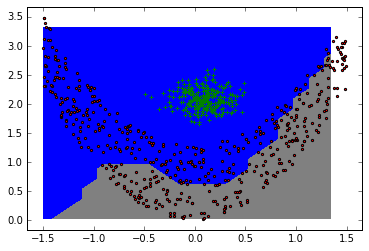

0.333333333333


In [82]:
%matplotlib inline
nn = xor([2,5,3,1],0.2,100000)
   
df1=pd.read_csv('data/hyperbolic.csv',sep=';')
x1=df1[['x1','x2']].values
y1=df1['y'].values
nn.fit(x1,y1)
plot_frontiere(x1,nn.predict)
plot_data(x1,y1)


plt.show()

print nn.score(x1,y1)